# Attribute Information:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

Objective: Our objective here is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
df= pd.read_csv(r"D:\Python files\Python Codes\Classification problems\Contraceptive-Method-prediction\dataset.csv")

#DF doesn't have headers, hence add headers
df.columns=["Wife age","Wife education","Husband education","Number of children ever born","Wife religion",
             "Wife now working?","Husband occupation","Standard-of-living index","Media exposure","Contraceptive method used"]
df.head(5)

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working?,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife age                      1472 non-null   int64
 1   Wife education                1472 non-null   int64
 2   Husband education             1472 non-null   int64
 3   Number of children ever born  1472 non-null   int64
 4   Wife religion                 1472 non-null   int64
 5   Wife now working?             1472 non-null   int64
 6   Husband occupation            1472 non-null   int64
 7   Standard-of-living index      1472 non-null   int64
 8   Media exposure                1472 non-null   int64
 9   Contraceptive method used     1472 non-null   int64
dtypes: int64(10)
memory usage: 115.1 KB


In [4]:
# To check if there are any values other than expected we will check unique values across features
for col in df.columns[0:10]:
    print(col," unique values: ",df[col].nunique(),"- ")
    print(col," unique values: ",df[col].unique())
    print("\n")

Wife age  unique values:  34 - 
Wife age  unique values:  [45 43 42 36 19 38 21 27 44 26 48 39 37 24 46 40 29 31 33 25 28 47 32 49
 34 20 22 30 23 35 41 17 18 16]


Wife education  unique values:  4 - 
Wife education  unique values:  [1 2 3 4]


Husband education  unique values:  4 - 
Husband education  unique values:  [3 2 4 1]


Number of children ever born  unique values:  15 - 
Number of children ever born  unique values:  [10  7  9  8  0  6  1  3  2  4  5 12 11 13 16]


Wife religion  unique values:  2 - 
Wife religion  unique values:  [1 0]


Wife now working?  unique values:  2 - 
Wife now working?  unique values:  [1 0]


Husband occupation  unique values:  4 - 
Husband occupation  unique values:  [3 2 1 4]


Standard-of-living index  unique values:  4 - 
Standard-of-living index  unique values:  [4 3 2 1]


Media exposure  unique values:  2 - 
Media exposure  unique values:  [0 1]


Contraceptive method used  unique values:  3 - 
Contraceptive method used  unique values:  [1 2

C:\Users\Koustubh-Pranjali\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Koustubh-Pranjali\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


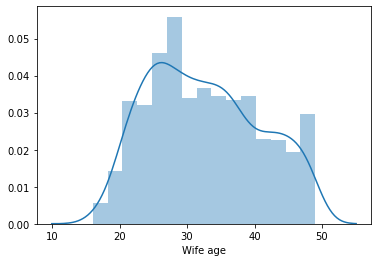

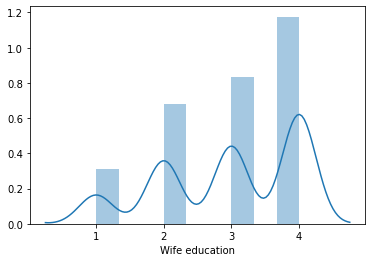

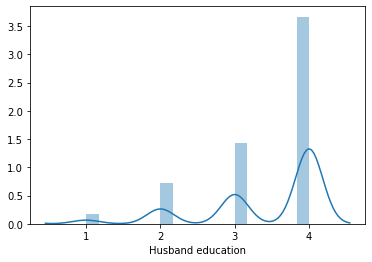

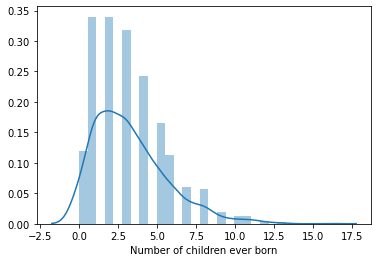

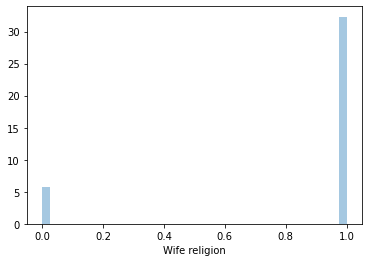

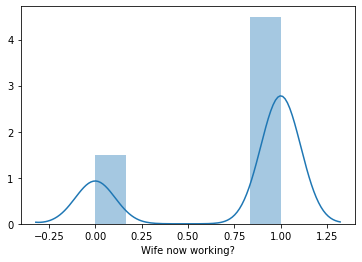

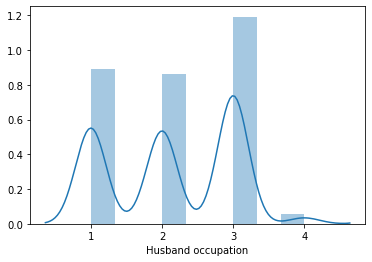

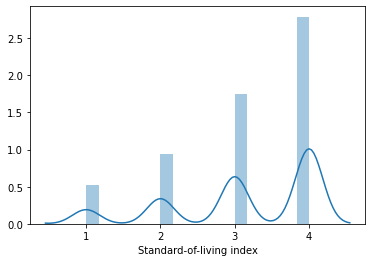

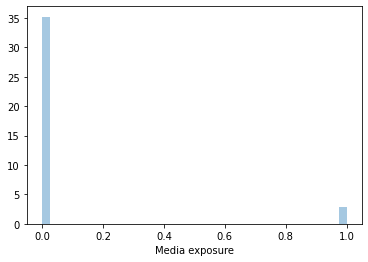

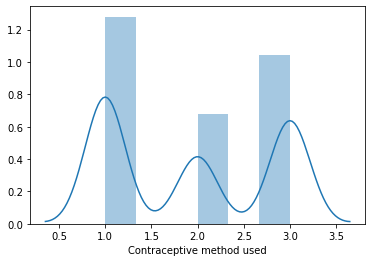

In [5]:
# Visualise distribution of data

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

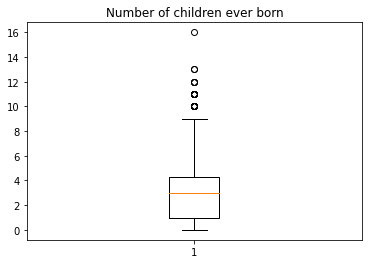

In [6]:
#Visualising box plot for number of children
# Visualizing outliers
plt.boxplot(df["Number of children ever born"])
plt.title("Number of children ever born")
plt.show()

In [7]:
# Checking how many rows have num of children=16
count_index=np.where(df['Number of children ever born']==16) #stores indexes satisfying this condition as tuples
print(count_index)
print("Number instances where 16 children born - ",len(df.iloc[count_index]))

(array([652], dtype=int64),)
Number instances where 16 children born -  1


In [8]:
#Lets remove the line row with the outlier
df.drop(652, inplace=True)

In [9]:
#All the data looks reasonable with no obvious outliers
#Splitting the data into X and Y.
Y=df["Contraceptive method used"]
X=df.drop("Contraceptive method used", axis=1)

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [10]:
#We will build a model and then check if there are any features that should be dropped.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, Y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [11]:
#Predicting on test data
Y_pred=model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
acc= accuracy_score(Y_test, Y_pred)
F1= f1_score(Y_test, Y_pred, average="micro")

cm=confusion_matrix(Y_test, Y_pred)
print("Accuracy score: ",acc,"\n","F1_score: ",F1,"\n",cm)


Accuracy score:  0.5108695652173914 
 F1_score:  0.5108695652173914 
 [[99 10 47]
 [35 31 29]
 [47 12 58]]


In [13]:
#lets check which of these variables can be removed
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

C:\Users\Koustubh-Pranjali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Koustubh-Pranjali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0668 ± 0.0320,Wife age
0.0636 ± 0.0187,Number of children ever born
0.0364 ± 0.0333,Wife education
0.0158 ± 0.0155,Husband occupation
0.0147 ± 0.0055,Wife religion
0.0054 ± 0.0091,Media exposure
0.0005 ± 0.0205,Standard-of-living index
0.0000 ± 0.0124,Wife now working?
-0.0141 ± 0.0116,Husband education


# SVM model

In [14]:
# building SVM model
from sklearn.svm import SVC
model_svm = SVC(kernel = "rbf", gamma = 1.5)
model_svm.fit(X_train, Y_train)

# prediction
Y_pred = model_svm.predict(X_test)

In [15]:
# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
F1 = f1_score(Y_test, Y_pred, average="micro") 
print("Accuracy score: ",acc,"\n","F1_score: ",F1,"\n",cm)


Accuracy score:  0.4592391304347826 
 F1_score:  0.4592391304347826 
 [[133   2  21]
 [ 60  10  25]
 [ 87   4  26]]


# DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(random_state=10)
classifier.fit(X_train,Y_train)

#Predicting on test data
Y_pred=classifier.predict(X_test)

In [17]:
acc= accuracy_score(Y_test, Y_pred)
F1= f1_score(Y_test, Y_pred, average="micro")

cm=confusion_matrix(Y_test, Y_pred)
print("Accuracy score: ",acc,"\n","F1_score: ",F1,"\n",cm)


Accuracy score:  0.4375 
 F1_score:  0.4375 
 [[85 26 45]
 [32 31 32]
 [45 27 45]]


# Randomforest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# create a regressor object 
classifier = RandomForestClassifier(n_estimators=25, random_state=10)

# fit the regressor with X and Y data 
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [19]:
acc= accuracy_score(Y_test, Y_pred)
F1= f1_score(Y_test, Y_pred, average="micro")

cm=confusion_matrix(Y_test, Y_pred)
print("Accuracy score: ",acc,"\n","F1_score: ",F1,"\n",cm)


Accuracy score:  0.5163043478260869 
 F1_score:  0.5163043478260869 
 [[103  16  37]
 [ 30  31  34]
 [ 42  19  56]]


# Gradient Boosting

In [20]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingClassifier()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [21]:
acc= accuracy_score(Y_test, Y_pred)
F1= f1_score(Y_test, Y_pred, average="micro")

cm=confusion_matrix(Y_test, Y_pred)
print("Accuracy score: ",acc,"\n","F1_score: ",F1,"\n",cm)


Accuracy score:  0.5652173913043478 
 F1_score:  0.5652173913043478 
 [[99  7 50]
 [25 32 38]
 [26 14 77]]


In [22]:
perm = PermutationImportance(reg, random_state=50).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1261 ± 0.0312,Number of children ever born
0.0967 ± 0.0445,Wife age
0.0647 ± 0.0177,Wife education
0.0310 ± 0.0309,Husband occupation
0.0163 ± 0.0209,Husband education
0.0054 ± 0.0060,Media exposure
0.0049 ± 0.0053,Wife religion
0.0027 ± 0.0077,Standard-of-living index
-0.0000 ± 0.0097,Wife now working?


In [23]:
#There are some features that are having a negative impact on model
#Lets run this model again dropping those features and check the metrics again
Y=df["Contraceptive method used"]
X=df.drop(["Contraceptive method used","Standard-of-living index","Media exposure","Husband education","Wife now working?"], axis=1)
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [24]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingClassifier()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [25]:
acc= accuracy_score(Y_test, Y_pred)
F1= f1_score(Y_test, Y_pred, average="micro")

cm=confusion_matrix(Y_test, Y_pred)
print("Accuracy score: ",acc,"\n","F1_score: ",F1,"\n",cm)

Accuracy score:  0.5625 
 F1_score:  0.5625 
 [[95 13 48]
 [24 33 38]
 [25 13 79]]
